# <center>Mosaicos con GDAL</center>

<center><img src="https://github.com/chlopezgis/cl-web/blob/main/gdal/img/mapa.JPG"></center>

**GDAL** es una biblioteca traductora para formatos de datos geoespaciales, que además proporciona un conjunto de herramientas para el tratamiento de estos datos. Se publica bajo una licencia de código abierto de estilo MIT por parte de la Fundación Geoespacial de Código Abierto (OSGEO). Existen varias motivos por las cuales GDAL es una de las mejores opciones para generar mosaicos:

* **Soporte de formatos**: Es capaz de **leer y escribir una amplia gama de formatos de datos geoespaciales**, como GeoTIFF, JPEG, PNG, MrSID, ECW, entre otros. Esto significa que puedes utilizar imágenes en diferentes formatos y combinarlas en un solo mosaico sin tener que convertirlas previamente a un formato específico.

* **Eficiencia y rendimiento**: Está **optimizado para el procesamiento eficiente de datos geoespaciales** y mosaicos de imágenes. Utiliza técnicas avanzadas de acceso y manipulación de datos, lo que permite manejar grandes conjuntos de imágenes de manera eficiente y rápida.

* **Compatibilidad con diferentes plataformas**: Es compatible con varias plataformas, incluyendo Windows, macOS y Linux. Esto brinda la flexibilidad de **trabajar en diferentes entornos de sistema operativo** y utilizar GDAL en diversas configuraciones y herramientas.

* **Comunidad y documentación**: Cuenta con una amplia comunidad de usuarios y desarrolladores que brindan soporte y comparten conocimientos. Además, hay una documentación detallada disponible, lo que facilita el aprendizaje y la resolución de problemas.

## Alcance

Este tutorial tiene como objetivo presentar el uso de las herramientas de GDAL a través de un ejemplo práctico de **creación de mosaicos**. Durante el tutorial, aprenderemos cómo consultar los metadatos de una imagen ráster, fusionar varias imágenes ráster en un mosaico y recortar el mosaico según un área de estudio definida.

Por otro lado, aunque no es la finalidad de este tutorial, también se presentará un ejemplo de cómo descargar datos desde el símbolo del sistema de Windows 10 utilizando el comando **wget**. Este ejemplo requiere la descarga e instalación previa de **wget** y su configuración correspondiente.

## Requisitos previos

Para el desarrollo del siguiente tutorial se requiere contar con GDAL instalado y configurado en la variables de entorno de su sistema operativo.

>_**NOTA**: Si bien el tutorial se desarrolla utilizando **Jupyter Notebook** se puede realizar sin inconvenientes utilizando el **Simbolo del sistema** de Windows o el **terminal** en Linux y visualizando los resultados en **QGIS**_

## Fuente de datos

Para este tutorial se utilizarán las imágenes ASTER GDEM disponibles desde los servidores del Ministerio del Ambiente de Perú (MINAM). Puedes realizar la descarga del siguiente **[link](https://geoservidorperu.minam.gob.pe/geoservidor/download_raster.aspx)**

## Empezemos

### 1. Descarga de datos

Como primer paso vamos a descargar los archivos ráster desde el [servidor del MINAM](https://geoservidorperu.minam.gob.pe/geoservidor/download_raster.aspx). Esto podemos hacerlo directamente desde el portal haciendo clic en cada grilla.

Sin embargo, para este ejemplo utilizaremos el programa **[wget]((https://geoservidorperu.minam.gob.pe/geoservidor/download_raster.aspx))** para windows que nos permite descargar los datos mediante línea de comandos. Para poder utilizarlo es necesario guardar el archivo **.exe** descargado en una carpeta y agregar dicha carpeta a las variables de entorno.

> _**Wget** es una herramienta informática creada por el Proyecto GNU. Se utiliza para recuperar contenido y archivos de varios servidores web._

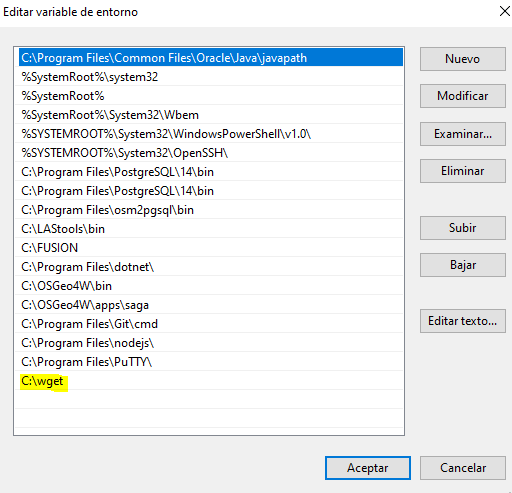

Ahora comenzaremos con la descarga de datos utilizando el comando **wget** ejecutado desde **Python**. Para obtener las URL's de descarga debemos dar clic derecho sobre cada grilla y seleccionar la opción **Copiar dirección de enlace**.

Luego, ordenamos las URL. La alternativa propuesta es la siguiente:

In [1]:
service = 'https://geoservidorperu.minam.gob.pe/geoservidor/archivos/download_raster'
files = ['ASTGTM_S09W079_dem.rar','ASTGTM_S09W078_dem.rar',
         'ASTGTM_S10W079_dem.rar','ASTGTM_S10W078_dem.rar',
         'ASTGTM_S10W077_dem.rar','ASTGTM_S11W079_dem.rar',
         'ASTGTM_S11W078_dem.rar','ASTGTM_S11W077_dem.rar']

Ahora, importaremos el módulo **os** de python

In [2]:
import os

Finalmente, con el siguiente codigo iniciaremos la descarga:

In [3]:
outDir = 'datos'
command = 'wget -O {outDir}/{filename} -q --no-check-certificate {url}'

for file in files:
    url = os.path.join(service, file)
    os.system(command.format(outDir=outDir, filename=file, url=url))
    print(f'Archivo {file} descargado')

Archivo ASTGTM_S09W079_dem.rar descargado
Archivo ASTGTM_S09W078_dem.rar descargado
Archivo ASTGTM_S10W079_dem.rar descargado
Archivo ASTGTM_S10W078_dem.rar descargado
Archivo ASTGTM_S10W077_dem.rar descargado
Archivo ASTGTM_S11W079_dem.rar descargado
Archivo ASTGTM_S11W078_dem.rar descargado
Archivo ASTGTM_S11W077_dem.rar descargado


Con el comando **dir** podemos consultar los archivos **.rar** descargados

In [4]:
!dir datos\*.rar

 El volumen de la unidad D es Datos
 El n£mero de serie del volumen es: 32D5-6A62

 Directorio de D:\Charlie\04_Proyectos_personales\_web\gdal\datos

15/06/2010  12:36         6,866,817 ASTGTM_S09W078_dem.rar
04/02/2011  14:46         5,386,976 ASTGTM_S09W079_dem.rar
22/07/2010  18:26         7,221,239 ASTGTM_S10W077_dem.rar
22/07/2010  18:26         6,392,082 ASTGTM_S10W078_dem.rar
04/02/2011  14:46         3,167,599 ASTGTM_S10W079_dem.rar
22/07/2010  18:26         6,374,241 ASTGTM_S11W077_dem.rar
27/04/2010  14:39         5,783,753 ASTGTM_S11W078_dem.rar
04/02/2011  14:46           530,899 ASTGTM_S11W079_dem.rar
               8 archivos     41,723,606 bytes
               0 dirs  39,599,632,384 bytes libres


### 2. Descomprimir archivos RAR

Este proceso tambien puede realizarse de **forma manual**, pero en este tutorial lo automatizaremos utilizando una función en **Python**.

Comenzaremos importando el módulo **patoolib**

In [5]:
import patoolib

Reutilizaremos las variables **files** y **outDir** que contiene el nombre de los archivos y el directorio donde se descargaron los datos respectivamente.

El código para descomprimir los archivos es el siguiente:

In [6]:
# Descomprimir el archivo RAR
for file in files:
    pathFile = os.path.join(outDir, file)
    patoolib.extract_archive(pathFile, outdir=outDir)

patool: Extracting datos\ASTGTM_S09W079_dem.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S09W079_dem.rar
patool:     with cwd=datos
patool: ... datos\ASTGTM_S09W079_dem.rar extracted to `datos'.
patool: Extracting datos\ASTGTM_S09W078_dem.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S09W078_dem.rar
patool:     with cwd=datos
patool: ... datos\ASTGTM_S09W078_dem.rar extracted to `datos'.
patool: Extracting datos\ASTGTM_S10W079_dem.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W079_dem.rar
patool:     with cwd=datos
patool: ... datos\ASTGTM_S10W079_dem.rar extracted to `datos'.
patool: Extracting datos\ASTGTM_S10W078_dem.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W078_dem.rar
patool

Los archivos descomprimidos son de tipo **.tif**, podemos listar los archivos con el comando **dir**

In [7]:
!dir /b datos\*.tif

ASTGTM_S09W078_dem.tif
ASTGTM_S09W079_dem.tif
ASTGTM_S10W077_dem.tif
ASTGTM_S10W078_dem.tif
ASTGTM_S10W079_dem.tif
ASTGTM_S11W077_dem.tif
ASTGTM_S11W078_dem.tif
ASTGTM_S11W079_dem.tif


### 3. Inspeccionar imágenes con **[gdalinfo](https://gdal.org/programs/gdalinfo.html)**

**`gdalinfo`** es una herramienta de línea de comandos incluida en la biblioteca **GDAL**. Permite obtener un **resumen detallado** de las **características y propiedades** de un archivo geoespacial sin tener que abrirlo en un software especializado.

A continuación, vamos inspeccionar las imagenes con **`gdalinfo`** para comprobar que tengan las misma carácteristicas: Número de bandas (Como son DEM tienen 1 banda), sistemas de referencia, tamaño del pixel, entre otros.

In [8]:
!gdalinfo -stats -mm datos/ASTGTM_S09W078_dem.tif

Driver: GTiff/GeoTIFF
Files: datos/ASTGTM_S09W078_dem.tif
Size is 3601, 3601
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.017453292519943

Warning 1: datos/ASTGTM_S09W078_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order


Del resultado observamos lo siguiente:

* **Driver**: GeoTIFF
* **Nombre del archivo**: ASTGTM_S09W078_dem.tif
* **Dimensiones (ancho y alto)**: 3601 x 3061
* **Número de bandas**: 1
* **Tipo de datos de las bandas**: Entero 16 bits
* **Sistema de coordenadas de referencia (SCR)**: EPGS 4326

### 4. Creación de mosaico con **[gdalbuildvrt](https://gdal.org/programs/gdalbuildvrt.html)**

**`gdalbuildvrt`** es otra potente herramienta proporcionada por **GDAL**. Este comando se utiliza para construir un archivo **Raster Virtual (VRT)** que es un archivo XML que define una **colección virtual de conjuntos de datos raster**.

Esta herramienta construye un **VRT** a partir de una **lista de conjuntos de datos de entrada**. La lista de conjuntos de datos se puede especificar al final de la línea de comando, o colocarse en un **archivo de texto** para listas muy largas.

El archivo **VRT** actúa como un **mosaico virtual** que proporciona acceso y vista previa a múltiples conjuntos de datos raster **sin tener que fusionarlos físicamente** en un solo archivo. Esto permite trabajar con grandes conjuntos de datos raster de manera eficiente y sin necesidad de copiar o alterar los archivos originales.

Para este ejercicio utilizaremos un archivo de texto con el nombre de los archivos de entrada que formaran el mosaico. Vamos a construir este archivo utilizando el comando **`dir`** con un patron que liste solo los archivos **.tif**.

In [9]:
!dir /b/s datos\*.tif

D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S09W078_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S09W079_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W077_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W078_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W079_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S11W077_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S11W078_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S11W079_dem.tif


Para escribir las rutas de los archivos vamos a utilizar el comando **>** que redirecciona la salida del comando a un archivo, en este caso un **.txt**

In [10]:
!dir /b/s datos\*.tif > datos\input_files.txt

Leer el archivo creado con el comando **type**

In [11]:
!type datos\input_files.txt

D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S09W078_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S09W079_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W077_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W078_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W079_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S11W077_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S11W078_dem.tif
D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S11W079_dem.tif


A partir de este archivo de texto vamos a generar el **VRT** utilizando el comando **`gdalbuildvrt`**

In [12]:
!gdalbuildvrt -input_file_list datos\input_files.txt datos\mosaico_ancash.vrt

0...10...20...30...40...50...60...70...80...90...100 - done.


Warning 1: D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S09W078_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S09W079_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W077_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: D:\Charlie\04_Proyectos_personales\_web\gdal\datos\ASTGTM_S10W078_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in as

Vamos a visualizar el resultado del ráster virtual utilizando el módulo **`rasterio`** de **python**.

> _**NOTA**: El resultado tambien se puede visualizar desde QGIS_

In [13]:
# Importar módulo
import rasterio
from rasterio.plot import show

In [14]:
# Abrir ráster
r = rasterio.open('datos/mosaico_ancash.vrt')

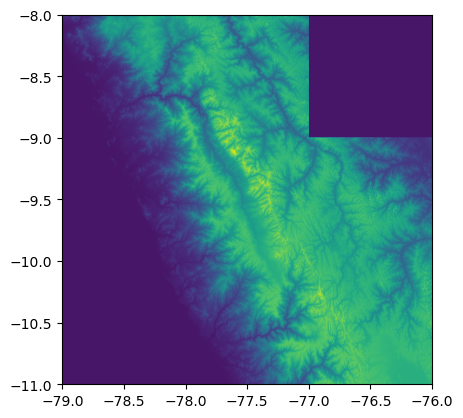

In [15]:
# Visualizar
show(r);

### 5. Recortar mosaico con **[gdalwarp](https://gdal.org/programs/gdalwarp.html)**

**`gdalwarp`** es una herramienta de línea de comandos proporcionada por **GDAL**. Se utiliza para reproyectar, remuestrear y transformar conjuntos de datos ráster. La utilidad **gdalwarp** permite realizar diversas operaciones en datos ráster, entre ellas:

* **Reproyección**: Cambiar el sistema de coordenadas de un conjunto de datos ráster a otro sistema de coordenadas.
* **Remuestreo**: Cambiar la resolución o el muestreo de un conjunto de datos ráster, como aumentar o disminuir el tamaño de píxel.
* **Recorte**: Extraer una subsección de un conjunto de datos ráster más grande en función de una caja delimitadora o un archivo vectorial especificado.
* **Mosaico**: Combinar varios conjuntos de datos ráster en un único mosaico, alineándolos correctamente.
* **Transformación**: Realizar transformaciones geométricas en datos ráster, como rotación o escala.

Vamos a utilizar **`gdalwarp`** para recortar el mosasico virtual. El recorte se realizará con la capa del departamento de Ancash ubicado en la carpeta **datos**.

In [16]:
!gdalwarp -cutline datos\ancash.shp -crop_to_cutline \
datos\mosaico_ancash.vrt datos\dem_ancash.tif -dstnodata -9999

Creating output file that is 6957P x 9851L.
Processing datos\mosaico_ancash.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


Warning 1: datos\ASTGTM_S09W079_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: datos\ASTGTM_S09W078_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: datos\ASTGTM_S10W079_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: datos\ASTGTM_S10W078_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: datos\ASTGTM_S10W077_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: datos\ASTGTM_S11W079_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: datos\ASTGTM_S11W078_dem.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Warning 1: datos\ASTGTM_S11W077_dem.tif: TIFFReadDirectoryCheckOrder:Invalid

Una vez finalizado el proceso, tendremos como resultado el ráster enmascarado y en formato TIF

In [17]:
rAncash = rasterio.open('datos/dem_ancash.tif')

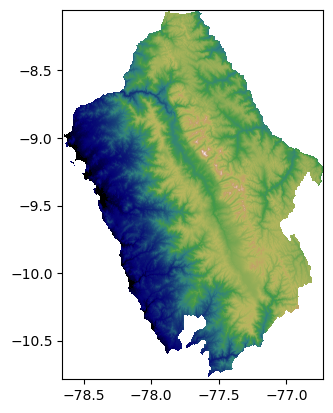

In [18]:
show(rAncash, cmap='gist_earth');

## Referencias

https://gdal.org/programs/gdalbuildvrt.html

https://gdal.org/programs/gdalwarp.html
